<a href="https://colab.research.google.com/github/SergiiRv/first/blob/master/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [ ]:
print(np.version.version)

1.19.2


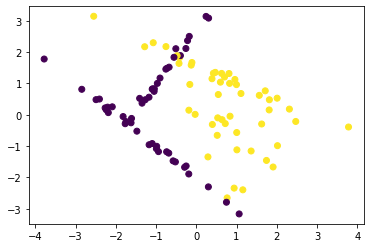

In [ ]:
# Sklearn : formimng the dataset to work on, looking into the data

samples, labels = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_classes=2, n_clusters_per_class=2)
plt.scatter(samples[:,0],samples[:,1], c= labels)

In [ ]:
from sklearn import tree

In [ ]:
clf = tree.DecisionTreeClassifier()
Sk_Mod = clf.fit(samples, labels)

[Text(181.35000000000002, 199.32, 'X[0] <= -0.168\ngini = 0.5\nsamples = 100\nvalue = [51, 49]'),
 Text(111.60000000000001, 163.07999999999998, 'X[1] <= 1.581\ngini = 0.252\nsamples = 54\nvalue = [46, 8]'),
 Text(55.800000000000004, 126.83999999999999, 'X[0] <= -0.186\ngini = 0.049\nsamples = 40\nvalue = [39, 1]'),
 Text(27.900000000000002, 90.6, 'gini = 0.0\nsamples = 39\nvalue = [39, 0]'),
 Text(83.7, 90.6, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(167.4, 126.83999999999999, 'X[0] <= -0.405\ngini = 0.5\nsamples = 14\nvalue = [7, 7]'),
 Text(139.5, 90.6, 'X[1] <= 2.141\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(111.60000000000001, 54.359999999999985, 'X[0] <= -0.493\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(83.7, 18.119999999999976, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(139.5, 18.119999999999976, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(167.4, 54.359999999999985, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(195.3, 90.6, 'gini = 0.0\ns

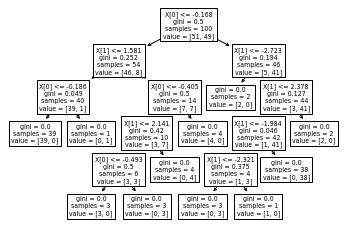

In [ ]:
tree.plot_tree(clf) 

In [ ]:
# checking and testing the method for efficentsy
print(Sk_Mod.predict_proba([[0.5, 1]]))
print("[0.5, 1]", Sk_Mod.predict([[0.5, 1]]))
print("[0.5, -1]", Sk_Mod.predict([[0.5, -1]]))
print("[0, 3]", Sk_Mod.predict([[0, -3]]))
print("[0, -3]", Sk_Mod.predict([[0, 3]]))
print("[33, 0]", Sk_Mod.predict([[33, 0]]))

[[0. 1.]]
[0.5, 1] [1]
[0.5, -1] [1]
[0, 3] [0]
[0, -3] [0]
[33, 0] [1]


In [ ]:
#creating hand-made tree via class

class Node:

    def __init__(self, data, labels):
        self.left = None
        self.right = None
        self.data = data
        self.labels = labels
        self.current_jenny = None
        self.current_threshold = None
        self.current_label = None
        self.current_feature = None
        
        
    def Fjenny(self, llabels):
        iterr = np.unique(llabels)
        count_iterr = np.zeros(len(iterr))
        #print("iterr=", iterr, "\n count_iterr=",count_iterr)
        for i, x in enumerate(iterr):
            count_iterr[i] = (llabels==x).astype(int).sum()
        jenny_out = 1 - sum([(xx/count_iterr.sum())**2 for xx in count_iterr])
        label = iterr[count_iterr==max(count_iterr)] #the Gini factor and the first and most common Labell in the subset
        return jenny_out, label[0]

    def fthreshold(self, ddata_full, llabels):#Threshold
        Threshd_out = 0
        k=0
        Cart_list = np.zeros(ddata_full.shape[1])
        Cart_Th_list = np.zeros(ddata_full.shape[1])
        for j in range(ddata_full.shape[1]):
            ddata = ddata_full[:, j]
            Threshd =0
            Th_list = np.zeros(ddata.shape[0])
            for i, xx in enumerate(ddata):
                if xx==min(ddata):
                    x=xx + (np.absolute(xx)/1000+0.0000001)
                elif xx==max(ddata):
                    x=xx - (np.absolute(xx)/1000+0.0000001)
                else:
                    x=xx
                left_ind = ddata<x
                right_ing = np.invert(left_ind)
                lefty = ddata[left_ind]
                righty = ddata[right_ing]
                Jn_left, _ = self.Fjenny(llabels[left_ind])
                Jn_right, _ = self.Fjenny(llabels[right_ing])
                Th_list[i] = len(lefty)/len(ddata)*Jn_left+len(righty)/len(ddata)*Jn_right
            Cart_Th_list[j] = ddata[Th_list==min(Th_list)][0]
            Cart_list[j]=min(Th_list)
        #print('Cart_list=', Cart_list, '\n', 'Cart_Th_list=', Cart_Th_list)
        Threshd_out=Cart_Th_list[Cart_list==min(Cart_list)]
        k=np.where(Cart_list==min(Cart_list))[0][0]
        return Threshd_out[0], k #provides the threshold and the feature number
    
    def fit_tree(self):
        #calculate Gini 
        print("another branch", self.labels)
        self.current_jenny, lunic = self.Fjenny(self.labels)
        print("gini=",self.current_jenny, "\n current_label=", lunic)
        if self.current_jenny==0:          
            self.current_label = lunic
            print("final label=", self.current_label)
            
        else:
            thrld_a, Feature = self.fthreshold(self.data, self.labels)
            
            self.current_feature = Feature
            print(type(self.current_feature))
            if min(self.data[:, Feature]) == thrld_a:
                thrld = thrld_a + (np.absolute(thrld_a)/1000+0.0000001)
            elif max(self.data[:, Feature]) == thrld_a:
                thrld = thrld_a - (np.absolute(thrld_a)/1000+0.0000001)
            else:
                thrld = thrld_a
            self.current_threshold = thrld
            #split_index = np.where(self.data[:,Feature]==thrld)[0][0]
            print("thrld",thrld, '\n self.data', self.data)
            
            #print("formation of the subset left ", self.labels[self.data[:, Feature]<thrld])
            self.left = Node(self.data[self.data[:, Feature]<thrld,:], self.labels[self.data[:, Feature]<thrld])
            #print("formation of the subset right ", self.labels[self.data[:, Feature]>=thrld])
            
            self.right = Node(self.data[self.data[:, Feature]>=thrld,:], self.labels[self.data[:, Feature]>=thrld])
            self.current_label = lunic
            print("final label=", self.current_label, "current_feature", self.current_feature, "\n")
            self.left.fit_tree()
            self.right.fit_tree()
    
    def predict(self, data_point):
        print("start prediction")
        if self.current_jenny == 0:
            return self.current_label
        elif data_point[0][self.current_feature]<self.current_threshold:
            print("going True - left")
            if self.left is None:
                return self.current_label
            else:
                return self.left.predict(data_point)
        else:
            print("going False - right")
            if self.right is None:
                return self.current_label
            else:
                return self.right.predict(data_point)

In [ ]:
root = Node(samples, labels)
print('labels', root.Fjenny(labels))
print('labels', root.Fjenny([10]))
print('threshold', root.fthreshold(samples, labels))
root.fit_tree()
print(root.current_label)
print("______________________________")
print("the prediction is")
print(root.predict([[0, 3]]))
print()
print(root.predict([[0.5, -1]]))

labels (0.4998, 0)
labels (0.0, 10)
threshold (-0.16059809721956064, 0)
another branch [1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1
 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0
 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 1]
gini= 0.4998 
 current_label= 0
<class 'numpy.int64'>
thrld -0.16059809721956064 
 self.data [[-0.41553016  1.82573306]
 [-0.73666862 -1.18085616]
 [-0.39466764  1.88971178]
 [ 0.51952528 -0.65633446]
 [ 0.76589213 -2.65363364]
 [-2.54755981  3.14612692]
 [ 0.39898129 -0.30941542]
 [ 0.71916232 -0.28100685]
 [-0.67520446  1.52041255]
 [ 0.70036433  1.20649374]
 [-1.76615217 -0.28523038]
 [-1.4757607  -0.52319573]
 [-3.77847069  1.78004823]
 [-1.26740953  0.48034731]
 [ 0.62875898  1.32051834]
 [-0.18677776 -1.89040675]
 [-1.81788101 -0.05638893]
 [ 0.53233657 -0.09813316]
 [ 0.95908516  1.1272275 ]
 [ 1.6234104  -0.29397745]
 [ 1.36151178 -1.15635322]
 [-0.98359876 -1.00605509]
 [-0.1745378   2.50307

n_informative= 2
n_redundant= 1
another branch [1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 0 1
 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1 0
 1]
gini= 0.49777777777777776 
 current_label= 1
<class 'numpy.int64'>
thrld 0.6620911198700923 
 self.data [[ 1.86307994 -0.0459757  -1.05730806]
 [ 1.58533018  2.41700785  1.9596925 ]
 [-0.61510977 -1.7431186  -1.69789647]
 [ 1.6254577   2.50134717  2.03625885]
 [-2.0937253  -1.32269737 -0.411807  ]
 [-0.29015492 -1.17261014 -1.20880021]
 [-0.18196194 -0.84789228 -0.88906213]
 [ 1.23937007  1.37010207  0.92730129]
 [ 2.44422984  0.13705093 -1.15734221]
 [ 0.08773844 -1.28203196 -1.53978702]
 [ 0.30777024  0.90393599  0.8865245 ]
 [ 0.43799688  1.74049136  1.7902622 ]
 [-0.66617075 -1.43437293 -1.31095056]
 [ 0.49602749 -0.57362715 -0.93505315]
 [ 0.61277891  2.23428097  2.27095354]
 [ 0.47426249  0.88572321  0.77561939]
 [ 0.70922656  0.85484079  0.61307354]
 [-0.64189891 -1.64693172 -1.571

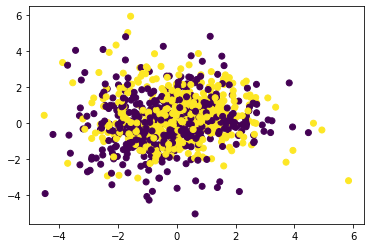

In [ ]:
# Accurasy comparison for two models used for different dtasets
from sklearn.model_selection import train_test_split
list 
InfoRedt = 4
n_feat = InfoRedt*2
n_smpls = 100
Sk_mod_Acc = np.array([], dtype = int)
My_Tree_mod_Acc = np.array([], dtype = int)
kk=0
for i in range(2, n_feat, 2):
    for j in range(1, InfoRedt):
        print("n_informative=", i)
        print("n_redundant=", j)
        samples, labels = make_classification(n_samples=n_smpls, n_features=i+j, n_informative=i, n_redundant=j, n_classes=2, n_clusters_per_class=2)
        plt.scatter(samples[:,0],samples[:,1], c= labels)
        X_train, X_test, y_train, y_test = train_test_split(samples, labels, random_state=0)
        #print(X_train.shape, X_test.shape, y_test.shape)
        clf = tree.DecisionTreeClassifier()
        Sk_Mod = clf.fit(X_train, y_train)
        #---------------------------------
        My_Tree_Mod = Node(X_train, y_train)
        My_Tree_Mod.fit_tree()
        Sk_mod_Acc_list = np.zeros(len(y_test))
        My_Tree_mod_Acc_list = np.zeros(len(y_test))
        for k in range(len(y_test)):
            #print(k)
            #print(X_test[k, :], X_test[k, :].ndim, X_test[k, :].reshape(1, -1).ndim, X_test[k, :].reshape(1, -1).shape )
            res_Sk_Mod = Sk_Mod.predict(X_test[k, :].reshape(1, -1))
            res_My_Tree = My_Tree_Mod.predict(X_test[k, :].reshape(1, -1))
            if res_Sk_Mod==y_test[k]:
                #print("Check Sk")
                Sk_mod_Acc_list[k] = 1
            if res_My_Tree==y_test[k]:
                My_Tree_mod_Acc_list[k] = 1
                #print("Check Me")
        print(Sk_mod_Acc_list, '\n', My_Tree_mod_Acc_list)
        #Sk_mod_Acc[kk] = Sk_mod_Acc_list.mean()
        #My_Tree_mod_Acc[kk] = My_Tree_mod_Acc_list.mean()
        Sk_mod_Acc = np.append(Sk_mod_Acc, Sk_mod_Acc_list.mean())
        My_Tree_mod_Acc = np.append(My_Tree_mod_Acc, My_Tree_mod_Acc_list.mean())
        kk+=1
print(Sk_mod_Acc, '\n', My_Tree_mod_Acc)

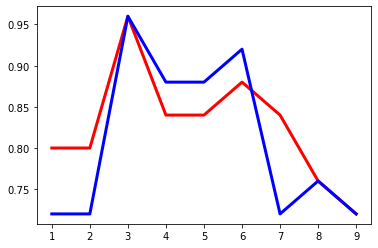

Comparison of Sklearn 0.8266666666666667+/-0.06531972647421808  vs My_Tree 0.8088888888888889+/-0.0938609425864128


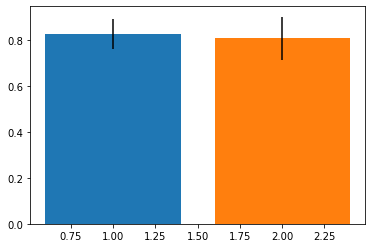

In [ ]:
#Building the cmparisson garph
xax = np.arange(1,len(Sk_mod_Acc)+1,1)
#print("xax", xax,  "xax.ndim", xax.ndim, "xax.shape", xax.shape, Sk_mod_Acc, Sk_mod_Acc.ndim, Sk_mod_Acc.shape )
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xax, Sk_mod_Acc, color = 'red', linewidth = 3)
ax.plot(xax, My_Tree_mod_Acc, color = 'blue', linewidth = 3)
plt.show()
print("Comparison of Sklearn {}+/-{}  vs My_Tree {}+/-{}".format(Sk_mod_Acc.mean(), np.std(Sk_mod_Acc), My_Tree_mod_Acc.mean(), np.std(My_Tree_mod_Acc)))

fig2, ax2 = plt.subplots()
rects1 = ax2.bar(1, Sk_mod_Acc.mean(), width=0.8, label='Sklearn', yerr = np.std(Sk_mod_Acc))
rects2 = ax2.bar(2, My_Tree_mod_Acc.mean(), width=0.8, label='My_Tree', yerr =  np.std(My_Tree_mod_Acc))

plt.show()

(75, 9) (25, 9) (25,)
0.76
Accuracy: 0.70 (+/- 0.14)


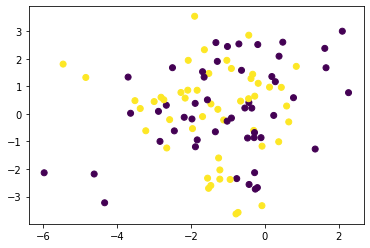

In [ ]:
#Evaluation of Decision tree algorithms with internal Sklearn tools

from sklearn.model_selection import cross_val_score
samples, labels = make_classification(n_samples=100, n_features=i+j, n_informative=i, n_redundant=j, n_classes=2, n_clusters_per_class=2)
plt.scatter(samples[:,0],samples[:,1], c= labels)
X_train, X_test, y_train, y_test = train_test_split(samples, labels, random_state=0)
print(X_train.shape, X_test.shape, y_test.shape)

clf = tree.DecisionTreeClassifier()
Sk_Mod = clf.fit(X_train, y_train)

#evaluating estimator
scores = Sk_Mod.score(X_test, y_test)
print(scores)

#Cross-validation
scoresCV = cross_val_score(clf, samples, labels, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scoresCV.mean(), scoresCV.std() * 2))




In [ ]:
#Automatic parameter searches
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distributions = {'max_depth': randint(1, 10), 'min_samples_leaf': randint(1, 10)}

search = RandomizedSearchCV(estimator=tree.DecisionTreeClassifier,n_iter=5, param_distributions=param_distributions, random_state=0)
search.fit(X_train, y_train)
print(search.best_params_)

TypeError: Cannot clone object. You should provide an instance of scikit-learn estimator instead of a class.

In [ ]:
#Cross-validation function for my Node class

def Cross_Val(Data_test, Label_test):
    
    n_splits = 5
    My_Tree_mod_Acc = np.array([], dtype = np.float32)
    for i in range(0, n_splits):
        indx_out = np.arange(0, len(Label_test))
        indx_in = np.arange(0, len(Label_test), n_splits)
        d_test = Data_test[indx_in, :]
        l_test = Label_test[indx_in]
        mask = np.in1d(indx_out, indx_in, invert=True)
        indx_out = indx_out[mask]
        d_train = Data_test[indx_out, :]
        l_train = Label_test[indx_out]
        My_Tree_mod_Acc_list = np.zeros(len(l_test))
        My_Tree_Mod = Node(d_train, l_train)
        My_Tree_Mod.fit_tree()
        for k in range(len(l_test)):
            res_My_Tree = My_Tree_Mod.predict(d_test[k, :].reshape(1, -1))            
            if res_My_Tree==l_test[k]:
                My_Tree_mod_Acc_list[k] = 1
        My_Tree_mod_Acc = np.append(My_Tree_mod_Acc, My_Tree_mod_Acc_list.mean())
    return My_Tree_mod_Acc.mean(), np.std( My_Tree_mod_Acc)
        

another branch [1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1
 0 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1
 1 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0
 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0
 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0
 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0
 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1
 1 1 1 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1
 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1]
gini= 0.4998 
 current_label= 1
<class 'numpy.int64'>
thrld 0.005563118902639719 
 self.data [[-4.68521477e-02 -1.60027740e+00]
 [-1.68514976e+00  8.77992663e-01]
 [-1.57936

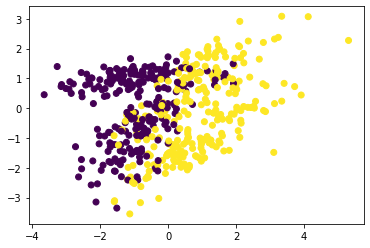

In [ ]:
#Cross-validation for my Node class Run
samples, labels = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, n_classes=2, n_clusters_per_class=2)
plt.scatter(samples[:,0],samples[:,1], c= labels)

Acc_my, Acc_std_my = Cross_Val(samples, labels)
print("Cross-valiadated accuracy is {}+/-{}".format(Acc_my, Acc_std_my))